In [1]:
# import all libraries and modules needed
import os
import sys
import datetime
import glob
import keras
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.optimizers import SGD
import tensorflow
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
keras.__version__

'1.2.2'

In [3]:
tensorflow.__version__

'0.12.0'

In [4]:
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

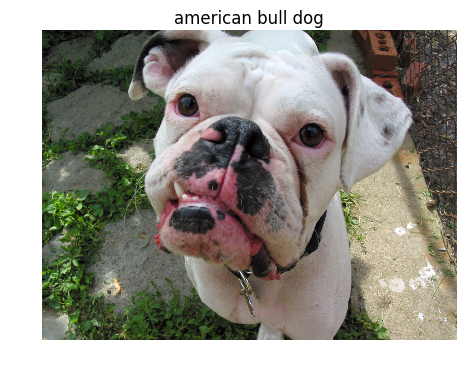

In [5]:
img = load_img('data/train/american_bull_dog/143736875_1c8a4d0588_b.jpg')
plt.imshow(img)
plt.axis('off')
plt.title('american bull dog')
plt.show()

In [6]:
x = img_to_array(img)
x2 = x.reshape((1,) + x.shape)

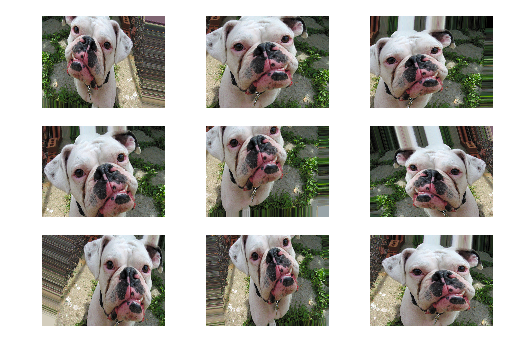

In [7]:
i = 0
fig = plt.figure()
plt.title('Pre-processed')
for batch in datagen.flow(x2, batch_size = 1):
    i += 1
    if i > 9:
        break
    temp = batch.reshape(x.shape)
    plt.subplot(3, 3, i)
    plt.imshow(temp.astype('uint8'))
    plt.axis('off')
plt.show()

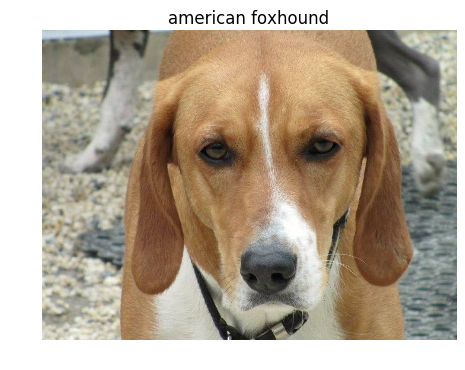

In [8]:
img = load_img('data/train/american_foxhound/8666079478_f15a4bf761_b.jpg')
plt.imshow(img)
plt.axis('off')
plt.title('american foxhound')
plt.show()

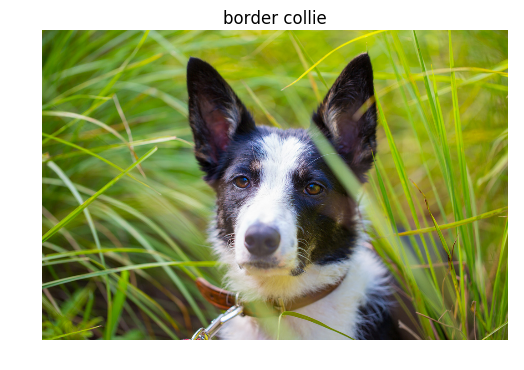

In [9]:
img = load_img('data/train/border_collie/11828320463_8fa6f118de_b.jpg')
plt.imshow(img)
plt.axis('off')
plt.title('border collie')
plt.show()

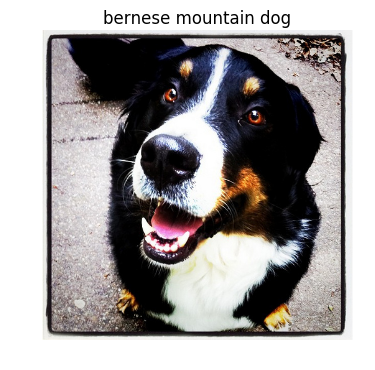

In [10]:
img = load_img('data/train/bernese_mountain_dog/6974836354_55228ae8c8.jpg')
plt.imshow(img)
plt.axis('off')
plt.title('bernese mountain dog')
plt.show()

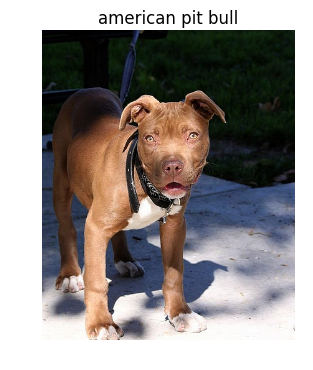

In [11]:
img = load_img('data/train/american_pit_bull/3253955567_0a760d07f4.jpg')
plt.imshow(img)
plt.axis('off')
plt.title('american pit bull')
plt.show()

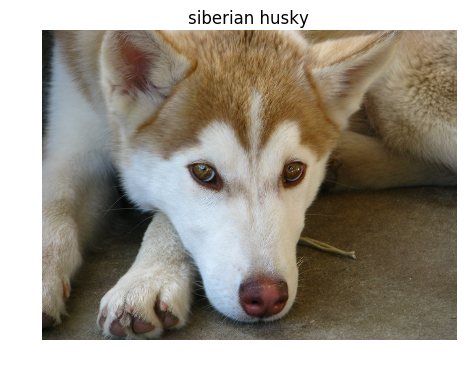

In [12]:
img = load_img('data/train/siberian_husky/3722201480_90c27928f2_b.jpg')
plt.imshow(img)
plt.axis('off')
plt.title('siberian husky')
plt.show()

In [13]:
# default settings
img_width, img_height = 224, 224

train_dir = 'data/train'
validate_dir = 'data/validate'
nb_epochs = 20
batch_size = 32
nb_classes = len(glob.glob(train_dir + '/*'))

In [14]:
# get number of images in training directory
nb_train_samples = 0
for r, dirs, files in os.walk(train_dir):
    for dr in dirs:
        nb_train_samples += len(glob.glob(os.path.join(r, dr + "/*")))
print(nb_train_samples)

422


In [15]:
# get number of images in validation directory
nb_validate_samples = 0
for r, dirs, files in os.walk(validate_dir):
    for dr in dirs:
        nb_validate_samples += len(glob.glob(os.path.join(r, dr + "/*")))
print(nb_validate_samples)

119


In [16]:
# data pre-processing for training
train_datagen =  ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    horizontal_flip = True)

In [17]:
# data pre-processing for validating
validate_datagen =  ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    horizontal_flip = True)

In [18]:
# generate and store training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size)

Found 422 images belonging to 6 classes.


In [19]:
# generate and store validation data
validate_generator = validate_datagen.flow_from_directory(
    validate_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size)

Found 119 images belonging to 6 classes.


In [20]:
# set up transfer learning on pre-trained ImageNet VGG19 model - remove fully connected layer and replace
# with softmax for classifying 6 classes
vgg19_model = VGG19(weights = 'imagenet', include_top = False)
x = vgg19_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(nb_classes, activation = 'softmax')(x)
model = Model(input = vgg19_model.input, output = predictions)

In [21]:
# freeze all layers of the pre-trained model
for layer in vgg19_model.layers:
    layer.trainable = False

In [22]:
# compile the new model using a RMSProp optimizer
model.compile(optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [23]:
# fit the model, log the results and the training time
now = datetime.datetime.now
t = now()
transfer_learning_history = model.fit_generator(
    train_generator,
    nb_epoch = nb_epochs,
    samples_per_epoch = nb_train_samples,
    validation_data = validate_generator,
    nb_val_samples = nb_validate_samples,
    class_weight='auto')
print('Training time: %s' % (now() - t))

Epoch 1/20
422/422 [==============================] - 357s - loss: 2.0933 - acc: 0.2156 - val_loss: 2.3174 - val_acc: 0.1597
Epoch 2/20
422/422 [==============================] - 360s - loss: 1.7539 - acc: 0.2725 - val_loss: 2.1122 - val_acc: 0.1765
Epoch 3/20
422/422 [==============================] - 354s - loss: 1.7400 - acc: 0.2536 - val_loss: 1.8462 - val_acc: 0.2437
Epoch 4/20
422/422 [==============================] - 377s - loss: 1.6514 - acc: 0.3009 - val_loss: 1.7837 - val_acc: 0.3193
Epoch 5/20
422/422 [==============================] - 369s - loss: 1.5490 - acc: 0.3626 - val_loss: 2.0742 - val_acc: 0.1765
Epoch 6/20
422/422 [==============================] - 361s - loss: 1.5002 - acc: 0.3957 - val_loss: 1.8282 - val_acc: 0.2353
Epoch 7/20
422/422 [==============================] - 363s - loss: 1.4701 - acc: 0.4028 - val_loss: 2.2645 - val_acc: 0.1681
Epoch 8/20
422/422 [==============================] - 363s - loss: 1.4525 - acc: 0.4123 - val_loss: 2.0612 - val_acc: 0.2017


In [24]:
# evaluate the performance the new model and report the results
score = model.evaluate_generator(validate_generator, nb_validate_samples/batch_size, pickle_safe=False)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 2.05220556259
Test Accuracy: 0.3125


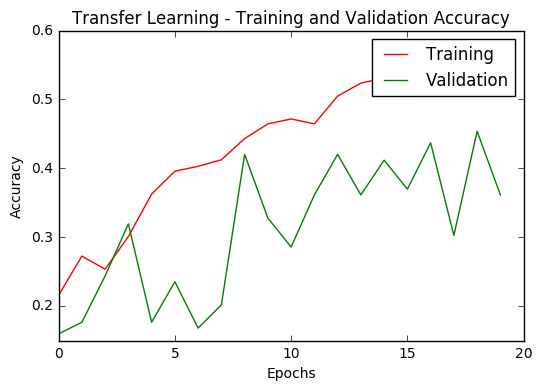

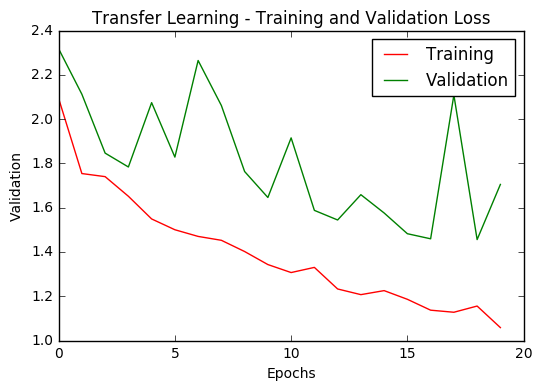

In [25]:
# plot the accuracy and loss data
xfer_acc = transfer_learning_history.history['acc']
val_acc = transfer_learning_history.history['val_acc']
xfer_loss = transfer_learning_history.history['loss']
val_loss = transfer_learning_history.history['val_loss']
epochs = range(len(xfer_acc))

plt.figure()
plt.plot(epochs, xfer_acc, 'r-', label = 'Training')
plt.plot(epochs, val_acc, 'g-', label = 'Validation')
plt.title('Transfer Learning - Training and Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(epochs, xfer_loss, 'r-', label = 'Training')
plt.plot(epochs, val_loss, 'g-', label = 'Validation')
plt.title('Transfer Learning - Training and Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Validation")
plt.legend()
plt.show()

In [26]:
model.save('dogs_vgg19_model_tl.h5')

In [27]:
# display the layers in the pretrained model
for i, layer in enumerate(vgg19_model.layers):
   print(i, layer.name)

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_conv4
11 block3_pool
12 block4_conv1
13 block4_conv2
14 block4_conv3
15 block4_conv4
16 block4_pool
17 block5_conv1
18 block5_conv2
19 block5_conv3
20 block5_conv4
21 block5_pool


In [28]:
# display the details of the model
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, None, None, 3) 0                                            
____________________________________________________________________________________________________
block1_conv1 (Convolution2D)     (None, None, None, 64 1792        input_1[0][0]                    
____________________________________________________________________________________________________
block1_conv2 (Convolution2D)     (None, None, None, 64 36928       block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_pool (MaxPooling2D)       (None, None, None, 64 0           block1_conv2[0][0]               
___________________________________________________________________________________________

In [29]:
# set up fine tuning on pre-trained ImageNet VGG16 model - train all layers
for layer in model.layers:
    layer.trainable = True

In [30]:
# compile the revised model using SGD optimizer with a learing rate of 0.0001 and a momentum of 0.9
model.compile(optimizer = SGD(lr = 0.0001, momentum=0.9), 
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [31]:
# fit the revised model, log the results and the training time
now = datetime.datetime.now
t = now()
fine_tuning_history = model.fit_generator(
    train_generator,
    nb_epoch = nb_epochs,
    samples_per_epoch = nb_train_samples,
    validation_data = validate_generator,
    nb_val_samples = nb_validate_samples,
    class_weight='auto')
print('Training time: %s' % (now() - t))

Epoch 1/20
422/422 [==============================] - 894s - loss: 0.9682 - acc: 0.6090 - val_loss: 1.1323 - val_acc: 0.5294
Epoch 2/20
422/422 [==============================] - 915s - loss: 0.6808 - acc: 0.7370 - val_loss: 0.8670 - val_acc: 0.6218
Epoch 3/20
422/422 [==============================] - 907s - loss: 0.5425 - acc: 0.7796 - val_loss: 0.8073 - val_acc: 0.6891
Epoch 4/20
422/422 [==============================] - 913s - loss: 0.5010 - acc: 0.8246 - val_loss: 0.7588 - val_acc: 0.6807
Epoch 5/20
422/422 [==============================] - 907s - loss: 0.4214 - acc: 0.8483 - val_loss: 0.6805 - val_acc: 0.6471
Epoch 6/20
422/422 [==============================] - 893s - loss: 0.4066 - acc: 0.8436 - val_loss: 0.8352 - val_acc: 0.6723
Epoch 7/20
422/422 [==============================] - 919s - loss: 0.3345 - acc: 0.8910 - val_loss: 0.6435 - val_acc: 0.7311
Epoch 8/20
422/422 [==============================] - 880s - loss: 0.3367 - acc: 0.8744 - val_loss: 0.6202 - val_acc: 0.7143


In [32]:
# evaluate the performance the revised model and report the results
score = model.evaluate_generator(validate_generator, nb_validate_samples/batch_size, pickle_safe=False)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.631899952888
Test Accuracy: 0.826086938381


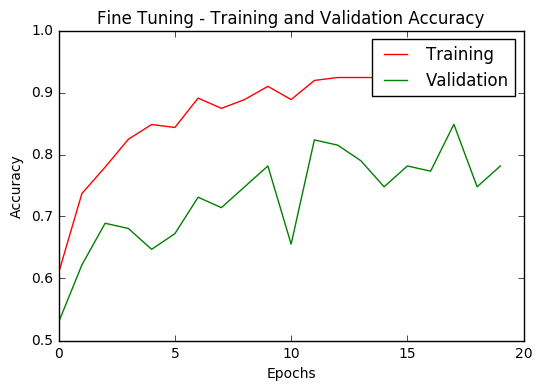

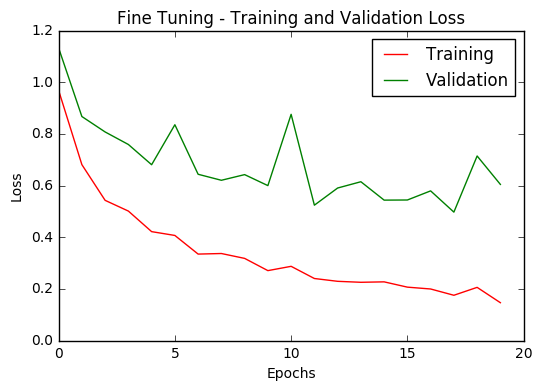

In [33]:
ft_acc = fine_tuning_history.history['acc']
val_acc = fine_tuning_history.history['val_acc']
ft_loss = fine_tuning_history.history['loss']
val_loss = fine_tuning_history.history['val_loss']
epochs = range(len(ft_acc))

plt.plot(epochs, ft_acc, 'r-', label = 'Training')
plt.plot(epochs, val_acc, 'g-', label = 'Validation')
plt.title('Fine Tuning - Training and Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(epochs, ft_loss, 'r-', label = 'Training')
plt.plot(epochs, val_loss, 'g-', label = 'Validation')
plt.title('Fine Tuning - Training and Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [34]:
model.save('dogs_vgg19_model_ft.h5')